<a href="https://colab.research.google.com/github/ramansbach/astrophysics_notebooks/blob/main/week8_ism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, matplotlib.pyplot as plt

## Radiative Transfer Equation

The radiative transfer equation states that the radiation that makes its way through the whole cloud drops exponentially:
$$
I_\lambda = I_0 e^{-\tau_\lambda} = I_0 e^{-\kappa_\lambda \rho_d s}
$$

In [ ]:
def rad_transfer(kap,rho, s, I0):
  """
  tau : float
    optical depth
  I0 : float
    initial intensity
  """
  tau = kap * rho * s
  return I0 * np.exp(-tau)

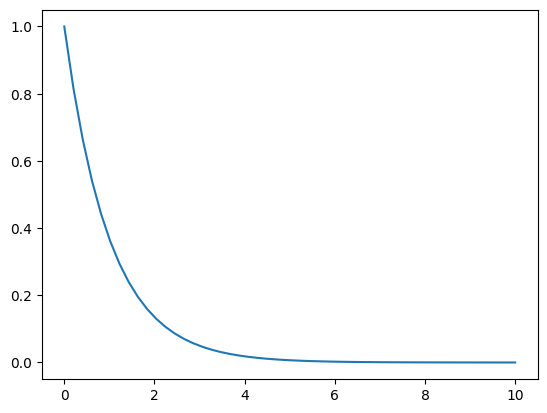

In [ ]:
kap = 1
rho = 1
s = np.linspace(0,10)
I = rad_transfer(kap,rho,s,1.0)
plt.plot(s, I)

This is the general shape of the curve for any wavelength passing through any cloud.  Let's see how it differs as we change the opacity, perhaps based on different wavelengths.

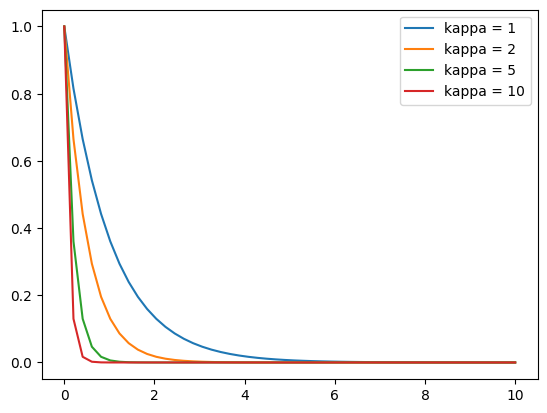

In [ ]:
kaps = np.array([1,2,5,10])
rho = 1
s = np.linspace(0,10)
for kap in kaps:
  I = rad_transfer(kap,rho,s,1.0)
  plt.plot(s, I)
plt.legend(['kappa = {}'.format(kap) for kap in kaps])

In [ ]:
['kappa = {}'.format(kap) for kap in kaps]

['kappa = 1', 'kappa = 2', 'kappa = 5', 'kappa = 10']

So all that changes is the rapidity with which extinction occurs.

## Free fall time (and introducing Astropy)

### Example question

What is the free fall time for a cloud that has a density of 100 particles cm$^{-3}$? Assume a mean molecular weight of $\mu = 2.8$.

The free fall time is given by $t_{ff} = \left(\frac{3\pi}{32G\rho} \right)^{1/2}$, where $\rho = n \mu m_H$ is the volume density and can be related to the number density.

Up till now, we've handled units ourselves to get a good feel for them.  However, there are Python packages that can help us manage them, and even Python packages specific to astrophysics.  Let's take a look at one good one, called astropy. We can do a lot with it, but for now we're just going to do some units work and look at ISM extinction code & tools.

In [ ]:
! pip install astropy

In [ ]:
import astropy.constants as const
import astropy.units as u

In [ ]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [ ]:
def free_fall_time(rho):
  """
  computes the free fall time for gravitational collapse of a cloud

  Parameters
  ----------
  rho : float * unit from astropy.units
    the density at the location in question

  Returns
  -------
  t : number * time unit
    the free fall time

  """
  t = np.sqrt(3*np.pi / (32*const.G*rho))
  return t

In [ ]:
n = 100 / (u.cm)**3
mu = 2.8
mh = 1.67e-27 * u.kg

In [ ]:
n

<Quantity 100. 1 / cm3>

In [ ]:
mh

<Quantity 1.67e-27 kg>

In [ ]:
mu

2.8

In [ ]:
rho = mu * mh * n

In [ ]:
rho

<Quantity 4.676e-25 kg / cm3>

In [ ]:
tff = free_fall_time(rho)

In [ ]:
tff

<Quantity 9.7145002e+16 cm(3/2) s / m(3/2)>

In [ ]:
tff.decompose()

<Quantity 9.7145002e+13 s>

In [ ]:
tff.to(u.year)

<Quantity 3078339.35350544 yr>

In [ ]:
tff.to(u.megayear)

<Quantity 3.07833935 Myr>

## Plot some extinction due to dust

Modified from https://learn.astropy.org/tutorials/color-excess.html

We discussed the concept of extinction in terms of the general radiative transfer equation. It turns out there are many different physical models that can be applied to predict what extinction will occur at each wavelength.  We're going to briefly look at a few that have been coded up and packaged in the `dust_extinction` package, which is an extension of `astropy`.

These extinction curves are for $A_\lambda$ normalized to $A_V$. It turns out the only parameter we need for these models is to know the ratio of the visual extinction coefficient $A_V$ to the color excess $E_{B-V}$:

$$
R_V \equiv \frac{A_V}{E_{B-V}}
$$

Accordingly, we choose some parameters from the literature and then plot the wavelength-dependent extinction for each model.

In [ ]:
! pip install dust_extinction

In [ ]:
from dust_extinction.parameter_averages import CCM89, F99

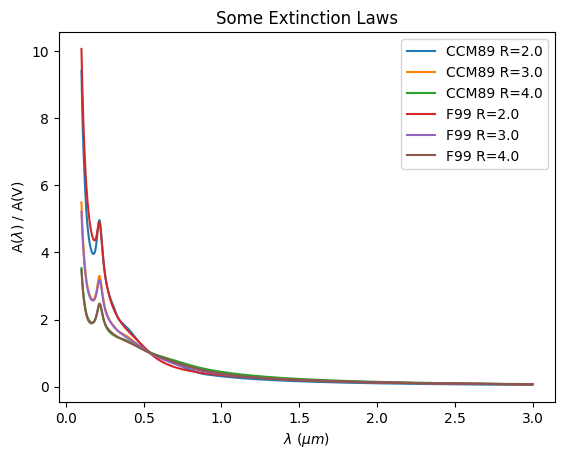

In [ ]:
 # Create wavelengths array.
wav = np.arange(0.1, 3.0, 0.001)*u.micron

for model in [CCM89, F99]:
    for R in (2.0,3.0,4.0):
        # Initialize the extinction model
        ext = model(Rv=R)
        plt.plot(wav, ext(wav), label=model.name+' R='+str(R))

plt.xlabel('$\lambda$ ($\mu m$)')
plt.ylabel('A($\lambda$) / A(V)')
plt.legend(loc='best')
plt.title('Some Extinction Laws')
plt.show()

Although the extinction clearly depends on how it is modeled and the given $R_V$, we see that all models display the expected behavior of higher extinction at shorter (bluer) wavelengths.